# ma438-hw4
NB and perceptron

### 1 Perceptron Details (20 Points)
> There is an important term called the bias missing from the equation above. Write the equation for the model with the bias term included. What is the significance of this term? Explain this using example plots for both cases.

$f(x)=
\left\{\begin{matrix}
 1 & \sum w_j*x_j + b \geq 0 \\
 0 & \sum w_j*x_j + b < 0
\end{matrix}\right.$

The significance of this term is this will help shifts the decision bounrdary. Without b the line always goes through the origin (0, 0) and you may get a poorer fit.



![](biasdiff.png)

As the example showed here the red line is without bias and blue line is with bias.

> Below there are four figures that show the distribution of datapoints with binary classes. The two colors denote the different classes. For each of these, reason whether the following do would give a high(> 0.95) classification accuracy.

![](perceptron.png)
(i) a perceptron without bias<br>
a, c, because the function is origin from 0.

(ii) a perceptron with bias<br>
b, d, because the function is not origin form 0.

>For the given Yelp data suggest a way of engineering a new feature from the given
set(or subset) of features. Explain your answer and justify how this new feature
might be capturing some form of complex behavior.

The stars, priceRange and waiterService might be closely corelated and could be amalgamated as a new feature. Since the domain knowledge suggests they are quite related: a high start restaurant is usually expensive and has good waiter service. We could use PCA to validate this hypothesis.

> The pseudocode for the vanilla perceptron algorithm is given below (Algorithm 1).
What do the weights and bias terms denote? Why do we need to update these in a perceptron? How do line 8 and line 9 in the pseudocode achieve this? (Hint:
Assume binary classes (0,1))

weights denote $w_i$, which is a weight vector that is corresponding to features in X, and bias denote b which is a constant that added up to the final function to predict Y. Th reason why we need to update them is we need to 'correct' the model based on newly feed entry point by each iteration by updating the weight and bias if we have any error for the model. The line 8 and line 9 is updating bias by adding error term and adding weights by error term times feature X. The error could be 0 - 0, 0 - 1, 1 - 0, 1 - 1, which are 0, -1, 1. The error term will gives the 'direction' to help model correct itself.

> Average Perceptron In an average perceptron, instead of returning the updated
weights/bias at the end of the training, we return the average of all the weights/bias
calculated in each iteration for each data point.


a) Write a pseudocode for the Average Perceptron. (Hint: You only need to
add a few lines to the given pseudocode of the vanilla perceptron.)

``` python
# init weights
self.w = np.zeros((self.X.shape[1]))
self.a = np.zeros((self.X.shape[1]))
# init bias
self.b = 0
self.b_cahced = 0
n = self.X.shape[0]
step = n * self.iter
for i in range(0, self.iter):
    for entry in range(0, self.X.shape[0]):
        error = self.Y[entry] - self.activation(self.X.loc[entry])
        if error != 0:
            # update bias
            self.b += error
            # update weights
            self.w += error * self.X.loc[entry] * self.lr
            # update a
            self.a += (float(step) / (n * self.iter)) * error * self.X.loc[entry] * self.lr
            self.b_cahced += (float(step) / (n * self.iter)) * error
        step -= 1
# print self.a
return self.a, self.b_cahced
```
b) What is the advantage/disadvantage of doing this?

Pros: <br>
It will be more robust to the 'noisy' data that might change the later, prevent overfitting. Plus, it will save the space for average weight by computing in real time instead of store them and divide them later.

Cons: <br>
It could take slightly more computation than the vanilla version of the perceptron. And it could 'erase' some of the pattern in the model.

### 2.1 Naive Bayes Details (20 Points)

>Write down the mathematical expression for P (Y |X) given by the Naive Bayes
Classifier(Hint: It’s not just the Bayes equation).

P(Y|X) = $\frac{P(Y)*P(X|Y)}{P(X)}$ = $\frac{prior*likelihood}{evidence}$ = $P(X_1|Y)*P(X_2|Y)...*P(X_n|Y)$


> Suppose your data has binary class labels , i.e y ∈ {0, 1}, write the expression for
predicting the class for a given input row. You will use this expression in your
implementation.

$y_{NB} = argmax(P(X|Y)P(Y))$, so we first <br>
compute prob for class 0 P0 = $P(X_1|Y=0)*P(X_2|Y=0)...*P(X_n|Y=0)$, then <br>
compute prob for class 1 P1 = $P(X_1|Y=1)*P(X_2|Y=1)...*P(X_n|Y=1)$. <br>
Then we take argmax(P0, P1), then we get the prediction :)

> State the naive assumption that lets us simplify the expression P (X|Y )P (Y ). Is
this assumption true for the given Yelp data? Explain why or why not?

We assume all the features are independent. It is not true for all features in yelp dataset. As I mentioned above, some of the features are related(stars, priceRange and waiterService). However, we could use pca to elimate this problem.

> What part of the expression corresponds to the class prior? Considering the entire
Yelp data as the training dataset, calculate the maximum likelihood estimate for
the class prior with and without smoothing. What is the effect of smoothing on
the final probabilities?

P(Y) in the expression above is prior.  <br>
Without smoothing $\frac{N(X = a, Y = b)}{N(Y = b)}$.<br>
With smoothing $\frac{N(X = a, Y = b) + 1}{N(Y = b) + k}$ where k is number of possible labels in X.<br>
The effect of smoothing is avoiding the 0 final probabilities for some of the label that we didn't see before. It is a workaround to make sure the model works correctly even if we have incomplete labels seen in the training session.

>Specify the full set of parameters that need to be estimated for the NBC model of
the Yelp data. How many parameters are there?

Consider we are building a map with key, prob. The prob is the corresponding likelihood. The key will be consists by feature, label, and target class. For example, we will encounter calculating probability of a probability with 'city' as feature, 'Edinburgh' as label in feature, and 1 as target class. So, the total parameters would be $2*14*n$, which 2 is classes we have for isGoodForGroup, 14 is the feature number, n is the assume average labels in each feature.

> For the Yelp data, explicitly state the mathematical expression for the maximum
likelihood estimates (with smoothing) of the CPD parameters for the attribute
alcohol conditioned on the the class label goodForGroups.

$\frac{N(X = a, Y = b) + 1}{N(Y = b) + k}$<br>
In this case it should be $\frac{N(alcohol = a, goodForGroups = 1) + 1}{N(goodForGroups = 1) + k}$ and $\frac{N(alcohol = a, goodForGroups = 0) + 1}{N(goodForGroups = 0) + k}$

The possible value for a is (none full_bar beer_and_wine). So k is 3.

> Consider the entire Yelp data as the training dataset and goodForGroups as the
class label. Estimate the conditional probability distributions of the following
attributes with and without smoothing:

We know that goodForGroup = 1 has 12010, goodForGroup = 0 has 7990.<br>
So p(goodForGroup = 1) = 0.6005 , p(goodForGroup = 0) = 0.3995

In [3]:
from nbc import *
from split import *
from load import *
split_normal("yelp_cat.csv",0.2)
X_train, X_test, Y_train, Y_test = load_normal("train.csv", "test.csv")
nb = NaiveBayes(X_train, Y_train)

In [4]:
#a) stars
nb.calcProb("stars")

stars 3.5goodForGroup = 0 0.223836301156
stars 4.5goodForGroup = 0 0.167135270228
stars 2.0goodForGroup = 0 0.0463917525773
stars 3.0goodForGroup = 0 0.159012808497
stars 4.0goodForGroup = 0 0.241330834114
stars 5.0goodForGroup = 0 0.042330521712
stars 2.5goodForGroup = 0 0.0945017182131
stars 1.0goodForGroup = 0 0.00515463917526
stars 1.5goodForGroup = 0 0.0203061543268
stars 3.5goodForGroup = 1 0.286518024588
stars 4.5goodForGroup = 1 0.103042300479
stars 2.0goodForGroup = 1 0.0360491769119
stars 3.0goodForGroup = 1 0.191289852053
stars 4.0goodForGroup = 1 0.258908105855
stars 5.0goodForGroup = 1 0.0142738070431
stars 2.5goodForGroup = 1 0.0975203167327
stars 1.0goodForGroup = 1 0.00166701396124
stars 1.5goodForGroup = 1 0.0107314023755


In [5]:
#b) waiterService
nb.calcProb("waiterService")

waiterService FALSEgoodForGroup = 0 0.14526710403
waiterService TRUEgoodForGroup = 0 0.233364573571
waiterService BLANKgoodForGroup = 0 0.621368322399
waiterService FALSEgoodForGroup = 1 0.339758282976
waiterService TRUEgoodForGroup = 1 0.479162325484
waiterService BLANKgoodForGroup = 1 0.18107939154


In [6]:
# c) caters
nb.calcProb("caters")

caters TRUEgoodForGroup = 0 0.112308653546
caters FALSEgoodForGroup = 0 0.134176819744
caters BLANKgoodForGroup = 0 0.75351452671
caters TRUEgoodForGroup = 1 0.272869347781
caters FALSEgoodForGroup = 1 0.300687643259
caters BLANKgoodForGroup = 1 0.42644300896


In [7]:
# d) attire
nb.calcProb("attire")

attire formalgoodForGroup = 0 0.000624804748516
attire dressygoodForGroup = 0 0.0101530771634
attire casualgoodForGroup = 0 0.396282411746
attire BLANKgoodForGroup = 0 0.592939706342
attire formalgoodForGroup = 1 0.00229214419671
attire dressygoodForGroup = 1 0.0293811210669
attire casualgoodForGroup = 1 0.874244634299
attire BLANKgoodForGroup = 1 0.0940821004376


What is the effect of smoothing (e.g., any difference compared to 4.)? Which
attribute shows the most association with the class? Why?

It is basically for workaround of the unseen attributes

### 3. Analysis

Now you will evaluate your models avg.py and nbc.py using cross validation and learn- ing curves. Cross-validation is a powerful tool to tune your hyperparameters and gauge how well your learned model generalizes. The basic idea behind cross-validation is that a subset of the data is kept aside(called the validation set) before the training begins. When we have a learned model, the validation set can used to test the performance of our model.

In k-fold cross-validation, the data is divided into k subsets. In each iteration we use one such subset as the test set and train on the remaining k − 1 subsets as training set. This process is repeated k times. We then take the average error accross all k trails. This gives a more accurate measure of model quality than if you were to hold out some fixed subset of the training data as validation set.

In general you would use cross-validation to tune the hyperparameters of your model (e.g. MaxIter in the Perceptron model), but for the following problems you should use the default value.

In [1]:
from sklearn.model_selection import KFold
from split import split, split_normal
from util import *
from perceptron import *
from nbc import *
from tqdm import tqdm

### 1 & 2 & 3

### Perceptron

In [8]:
# Perceptron zeroloss
percent = [1, 10, 50, 70]
mean_zero_loss = []
baseline = []
iteration = 2
train_set = 'train.csv'
test_set = 'test.csv'

In [9]:
for p in percent:
    test = (100-p)/float(100)
    temp_zero_loss = 0
    temp_baseline = 0
    for i in tqdm(range(0,9)):
        split("yelp_cat.csv",test)
        X_train, X_test, Y_train, Y_test = load(train_set, test_set)
        p = perceptronAverage(iteration, X_train, Y_train)
        p.train()
        temp_baseline += baselinea_zero_one(Y_train, Y_test)
        temp_zero_loss += p.test(X_test,Y_test)
    mean_zero_loss.append(float(temp_zero_loss)/10)
    baseline.append(float(temp_baseline)/10)

100%|██████████| 9/9 [02:08<00:00, 14.31s/it]


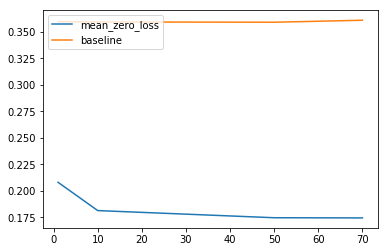

In [10]:
#plot for perceptron, consists mean_zero_loss, and baseline
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(percent, mean_zero_loss)
plt.plot(percent, baseline)
plt.legend(['mean_zero_loss', 'baseline'], loc='upper left')
plt.show()

### NBC

In [2]:
# Naive bayes zero one loss and square loss
percent = [1, 10, 50, 70]
mean_zero_loss = []
mean_square_loss = []
baseline = []
iteration = 2
train_set = 'train.csv'
test_set = 'test.csv'

for p in percent:
    test = (100-p)/float(100)
    temp_zero_loss = 0
    temp_baseline = 0
    temp_square = 0
    for i in tqdm(range(0,9)):
        split_normal("yelp_cat.csv",test)
        X_train, X_test, Y_train, Y_test = load_normal(train_set, test_set)
        nb = NaiveBayes(X_train, Y_train)
        # test
        temp_baseline += baselinea_zero_one(Y_train, Y_test)
        temp_zero_loss += nb.test_zero_one(X_test,Y_test)
        temp_square += nb.test_square(X_test, Y_test)
    mean_zero_loss.append(float(temp_zero_loss)/10)
    baseline.append(float(temp_baseline)/10)
    mean_square_loss.append(float(temp_square)/10)

100%|██████████| 9/9 [00:24<00:00,  2.77s/it]


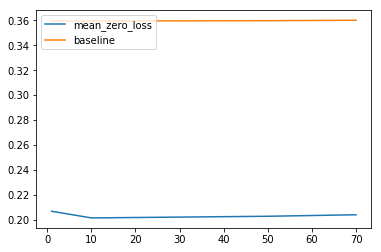

In [3]:
#plots for NBC consists mean zero loss and baseline
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(percent, mean_zero_loss)
plt.plot(percent, baseline)
plt.legend(['mean_zero_loss', 'baseline'], loc='upper left')
plt.show()

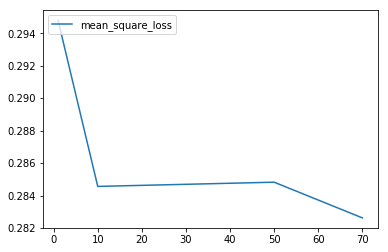

In [4]:
#plots for NBC squared loss version
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(percent, mean_square_loss)
plt.legend(['mean_square_loss'], loc='upper left')
plt.show()

**How the two classifiers compare with each other and with the baseline.**

They are both outperformed the baseline for sure. NBC has a very good loss score when it has a minimal data and the zero-one loss score kinda bounce back after 10(is it overfitting?). However, we can see that perceptron perform well than NBC after we feed it enough data.

**How is zero-one loss impacted by training set size.**

As training size increases, the zero-loss will decrease if the model doesn't overfit.

**How zero-one vs square-loss?**

I would say the squre loss is much helpful if we are dealing with NBC. Since NBC is a probabilistic model, and squre loss function is based on probability, so it will be more fit compare to the hard 1/0 zero on loss function.